In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
users = pd.read_csv('data/edredo_users_data.csv')

In [4]:
users.head()

,User Id,Average time spent on App in minutes,Average time spent on Website in minutes,Length of Membership in years,Yearly Amount Spent on paid contents
0,12345,12.655651,39.577668,4.082621,587.951054
1,12346,11.109461,37.268959,2.664034,392.204933
2,12347,11.330278,37.110597,4.104543,487.547505
3,12348,13.717514,36.721283,3.120179,581.852344
4,12349,12.795189,37.536653,4.446308,599.406092


In [5]:
users.describe()

,User Id,Average time spent on App in minutes,Average time spent on Website in minutes,Length of Membership in years,Yearly Amount Spent on paid contents
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12594.500000,12.052488,37.060445,3.533462,499.314038
std,144.481833,0.994216,1.010489,0.999278,79.314782
min,12345.000000,8.508152,33.913847,0.269901,256.670582
25%,12469.750000,11.388153,36.349257,2.930450,445.038277
50%,12594.500000,11.983231,37.069367,3.533975,498.887875
75%,12719.250000,12.753850,37.716432,4.126502,549.313828
max,12844.000000,15.126994,40.005182,6.922689,765.518462


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User Id                                   500 non-null    int64  
 1   Average time spent on App in minutes      500 non-null    float64
 2   Average time spent on Website in minutes  500 non-null    float64
 3   Length of Membership in years             500 non-null    float64
 4   Yearly Amount Spent on paid contents      500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


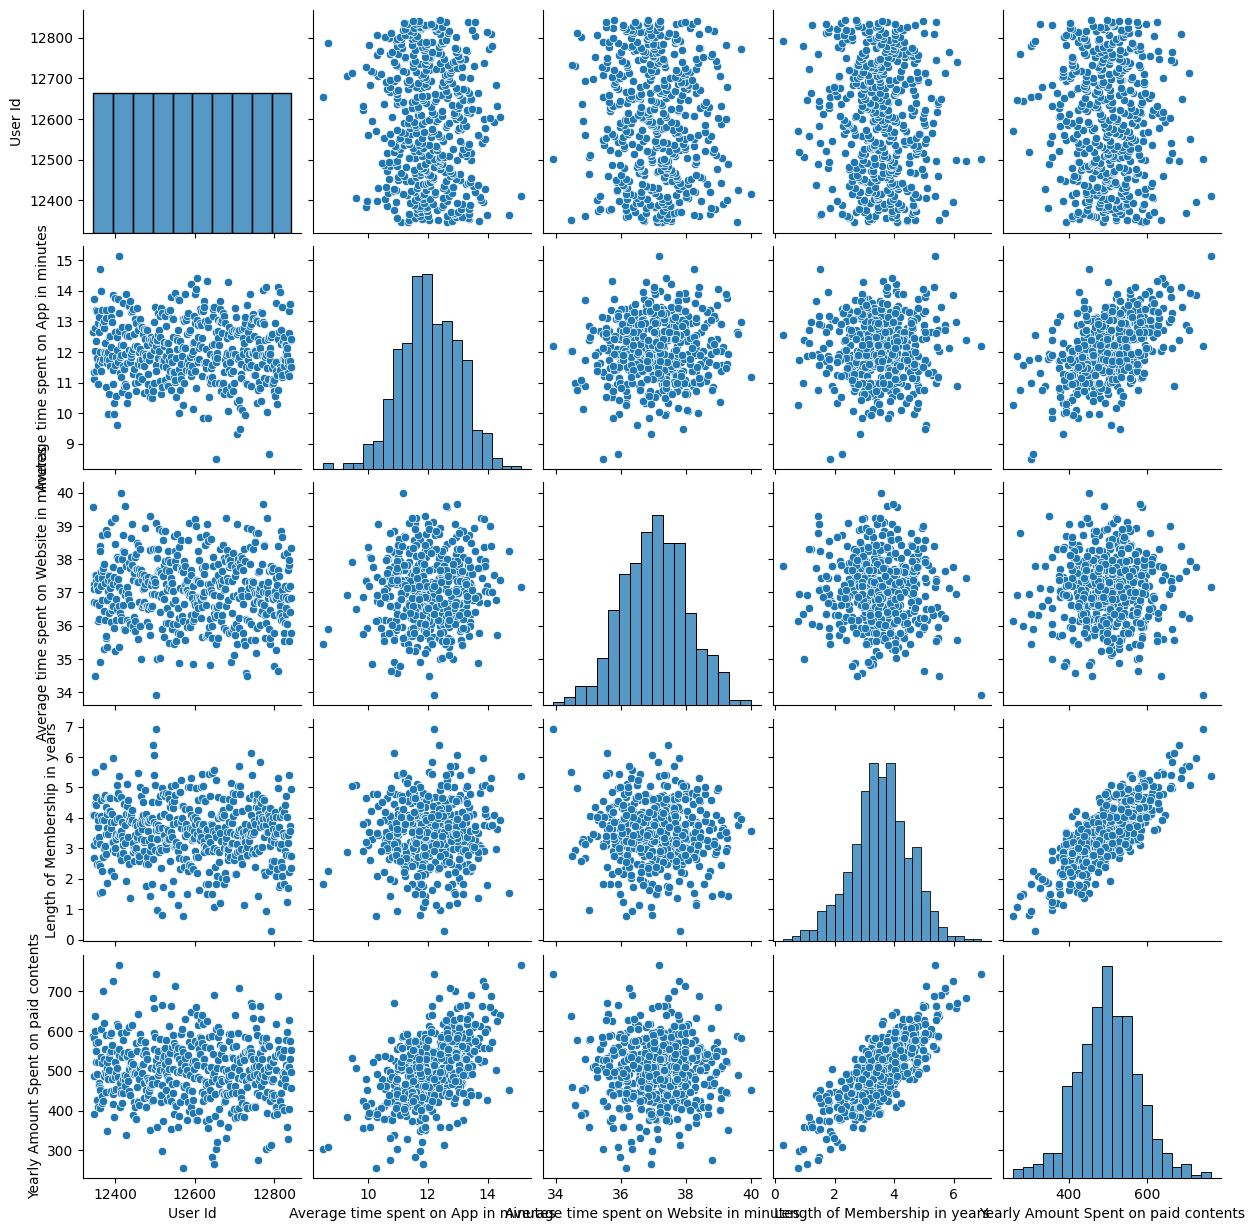

In [7]:
sns.pairplot(users)

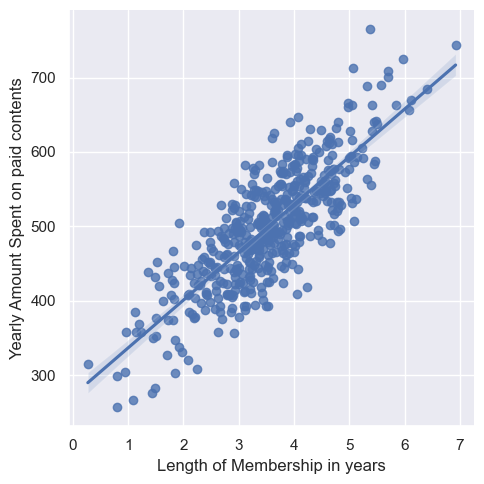

In [9]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership in years', y='Yearly Amount Spent on paid contents',data=users)

In [10]:
X = users[['Average time spent on App in minutes','Average time spent on Website in minutes', 'Length of Membership in years']]

In [12]:
y= users['Yearly Amount Spent on paid contents']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train )

print(model.coef_)

[38.00802494  0.53288792 62.7706933 ]


In [17]:
predictions = model.predict(X_test)

Text(0.5, 0, 'Y test')

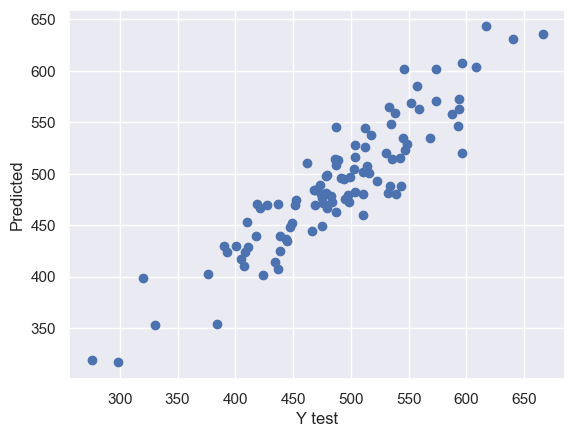

In [18]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

In [19]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 23.135922805951477
MSE: 807.1362653812605
RMSE: 28.410143705748137


/Users/sumit.d.verma/Desktop/edredo/edredo-App_vs_Web/edredo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent on paid contents', ylabel='Density'>

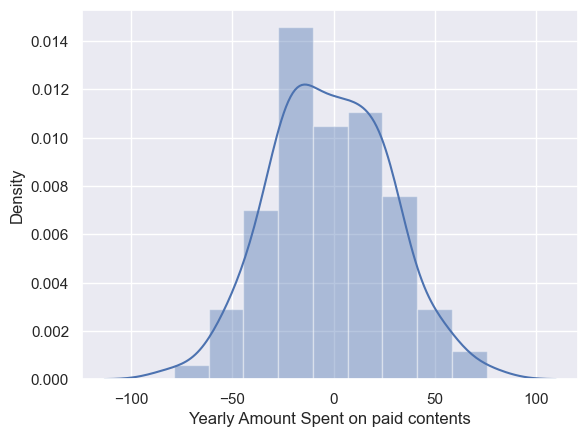

In [20]:
sns.distplot((y_test-predictions))

In [21]:
pd.DataFrame(model.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Average time spent on App in minutes,38.008025
Average time spent on Website in minutes,0.532888
Length of Membership in years,62.770693


In [23]:
#The greater the value the more related it is to the target, in this case Yearly Amount Spent on paid contents
#So Edredo should focus on the mobile app development